In [ ]:
"""
   Prática de Pré-Tratamento de Dados

📌 Descrição:
Este notebook apresenta um processo completo de pré-tratamento de dados de um dataset de e-commerce. O objetivo é aplicar técnicas de limpeza, padronização e imputação de valores para garantir a qualidade e consistência dos dados antes de análises exploratórias ou modelagem preditiva.

👨‍💻 Autor: CLEITON HENTGES
📅 Data: [28/08/2025]
💻 Linguagem: Python 3.x
"""

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [30]:
# Carregar dataset
df = pd.read_csv("ecommerce_dataset.csv")

print(" Primeiras linhas do dataset:")
df.head(10)


 Primeiras linhas do dataset:


,id_pedido,id_cliente,produto,categoria,preco,quantidade,data_pedido,estado,avaliacao
0,1,39,Notebook,Acessórios,1999.99,1.0,2023-11-13,MG,3.0
1,2,29,Tênis,Vestuário,2999.99,1.0,2023-01-22,MG,3.0
2,3,15,Notebook,Calçados,499.99,NaN,2023-11-22,São Paulo,NaN
3,4,43,Relógio,Eletrônicos,2999.99,1.0,2023-01-01,RJ,1.0
4,5,8,Notebook,Acessórios,2999.99,NaN,2023-05-13,São Paulo,4.0
5,6,21,Smartphone,Eletrônicos,-150.00,NaN,2023-08-21,BA,NaN
6,7,39,Tênis,Acessórios,NaN,1.0,2023-01-12,SP,5.0
7,8,19,Tênis,Eletrônicos,2999.99,1.0,2023-12-12,RS,1.0
8,9,23,Relógio,Acessórios,99.99,2.0,2023-02-15,RJ,1.0
9,10,11,Smartphone,Acessórios,1999.99,3.0,2023-02-03,SP,5.0


In [31]:
# 1. Visão geral do dataset

print("Informações iniciais:")
print(df.info(), "\n")

print("Valores nulos por coluna:")
print(df.isnull().sum(), "\n")

print("Tipos de dados das colunas:")
print(df.dtypes, "\n")

print("Estatísticas descritivas:")
print(df.describe(), "\n")

Informações iniciais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_pedido    200 non-null    int64  
 1   id_cliente   200 non-null    int64  
 2   produto      200 non-null    object 
 3   categoria    200 non-null    object 
 4   preco        176 non-null    float64
 5   quantidade   162 non-null    float64
 6   data_pedido  200 non-null    object 
 7   estado       179 non-null    object 
 8   avaliacao    164 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.2+ KB
None 

Valores nulos por coluna:
id_pedido       0
id_cliente      0
produto         0
categoria       0
preco          24
quantidade     38
data_pedido     0
estado         21
avaliacao      36
dtype: int64 

Tipos de dados das colunas:
id_pedido        int64
id_cliente       int64
produto         object
categoria       object
preco          floa

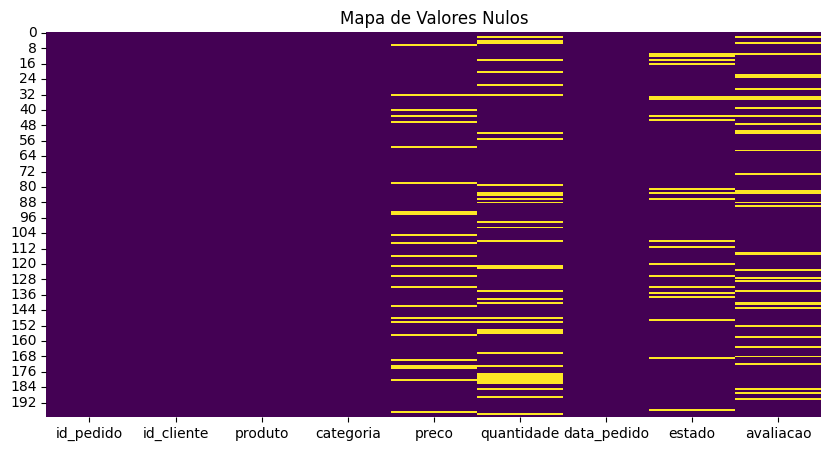

/tmp/ipython-input-1704752472.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['preco'].fillna(df['preco'].median(), inplace=True)
/tmp/ipython-input-1704752472.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [32]:
# 2. Visualizar valores nulos

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Nulos")
plt.show()

# 3. Tratamento de valores nulos

# Preencher preço nulo com a mediana
df['preco'].fillna(df['preco'].median(), inplace=True)

# Preencher quantidade nula com 1 (mínimo de compra)
df['quantidade'].fillna(1, inplace=True)

# Preencher avaliação nula com a moda (valor mais comum)
df['avaliacao'].fillna(df['avaliacao'].mode()[0], inplace=True)


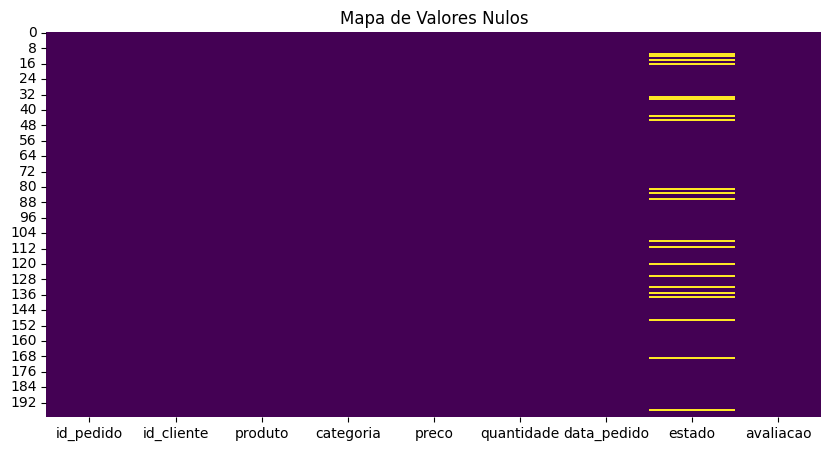

In [33]:
# 3.2 Verificando a presensa constante de valores nulos

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Nulos")
plt.show()


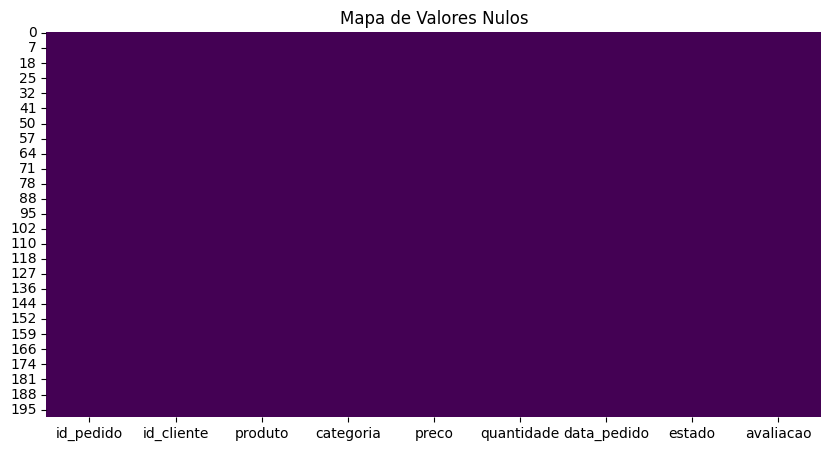

In [34]:
# 3.3 Deletando linhas com valores nulos
df.dropna(subset=['estado'], inplace=True)

# Verificando a presensa de valores nulos
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Nulos")
plt.show()

In [35]:

# 4. Imputação avançada (KNN)

# Aplicando apenas em colunas numéricas relevantes
num_cols = ['preco', 'quantidade', 'avaliacao']
imputer = KNNImputer(n_neighbors=3)
df[num_cols] = imputer.fit_transform(df[num_cols])



In [36]:
# 5. Remover duplicados
print(f"Número de linhas antes de remover duplicados: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Número de linhas depois de remover duplicados: {len(df)}")

Número de linhas antes de remover duplicados: 179
Número de linhas depois de remover duplicados: 179


In [37]:
#6. Tratar inconsistências

print(f"Número de linhas : {len(df)}")

# Padronizar estados (SP, RJ, MG, etc.)
df['estado'] = df['estado'].astype(str).str.strip().str.upper()
df['estado'].replace({"SÃO PAULO": "SP", "SP": "SP"}, inplace=True)

# Remover estados inválidos (como "XX" ou "NONE")
estados_validos = ["SP", "RJ", "MG", "BA", "RS"]
df = df[df['estado'].isin(estados_validos)]

# Remover preços negativos
df = df[df['preco'] > 0]

# Quantidade mínima = 1
df = df[df['quantidade'] > 0]

# Produtos inválidos
df = df[df['produto'] != "???"]

print(f"Número de linhas : {len(df)}")

Número de linhas : 179
Número de linhas : 175


/tmp/ipython-input-2450161387.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['estado'].replace({"SÃO PAULO": "SP", "SP": "SP"}, inplace=True)


In [38]:
 #7. Verificação final

print("✅ Valores nulos após tratamento:")
print(df.isnull().sum(), "\n")

print("📌 Primeiras linhas do dataset limpo:")
df.head(10)

✅ Valores nulos após tratamento:
id_pedido      0
id_cliente     0
produto        0
categoria      0
preco          0
quantidade     0
data_pedido    0
estado         0
avaliacao      0
dtype: int64 

📌 Primeiras linhas do dataset limpo:


,id_pedido,id_cliente,produto,categoria,preco,quantidade,data_pedido,estado,avaliacao
0,1,39,Notebook,Acessórios,1999.99,1.0,2023-11-13,MG,3.0
1,2,29,Tênis,Vestuário,2999.99,1.0,2023-01-22,MG,3.0
2,3,15,Notebook,Calçados,499.99,1.0,2023-11-22,SP,2.0
3,4,43,Relógio,Eletrônicos,2999.99,1.0,2023-01-01,RJ,1.0
4,5,8,Notebook,Acessórios,2999.99,1.0,2023-05-13,SP,4.0
6,7,39,Tênis,Acessórios,499.99,1.0,2023-01-12,SP,5.0
7,8,19,Tênis,Eletrônicos,2999.99,1.0,2023-12-12,RS,1.0
8,9,23,Relógio,Acessórios,99.99,2.0,2023-02-15,RJ,1.0
9,10,11,Smartphone,Acessórios,1999.99,3.0,2023-02-03,SP,5.0
13,14,40,Notebook,Acessórios,2999.99,3.0,2023-03-14,SP,4.0
